In [2]:
import sys,glob,datetime,os,gc,importlib,pickle,cftime,re
import xarray as xr
import numpy as np
import pandas as pd

import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from distinctipy import distinctipy
from matplotlib.backends.backend_pdf import PdfPages

import cartopy

import itertools
import warnings
warnings.filterwarnings("ignore")

ERROR 1: PROJ: proj_create_from_database: Open of /home/u/u290372/.conda/envs/py_main/share/proj failed


In [3]:
try:
    %matplotlib inline
    indicator = 'tas'
    %load_ext autoreload
    %autoreload 2
except:
    import argparse
    parser = argparse.ArgumentParser(description='look it up')
    parser.add_argument('-i', '--indicator')  
    args = vars(parser.parse_args())
    print(args)
    indicator = args['indicator']    

In [4]:
sys.path.append('/home/u/u290372/scripts/')
from cartopy_features import *
import _regions_ar6wg1 
sys.path.append('/home/u/u290372/scripts/cmip6_ensemble_scripts')
import _paths as _paths; importlib.reload(_paths)
import _regTS_ensemble
sys.path.append('/home/u/u290372/git-projects/regional_panels_on_map')
import regional_panels_on_map

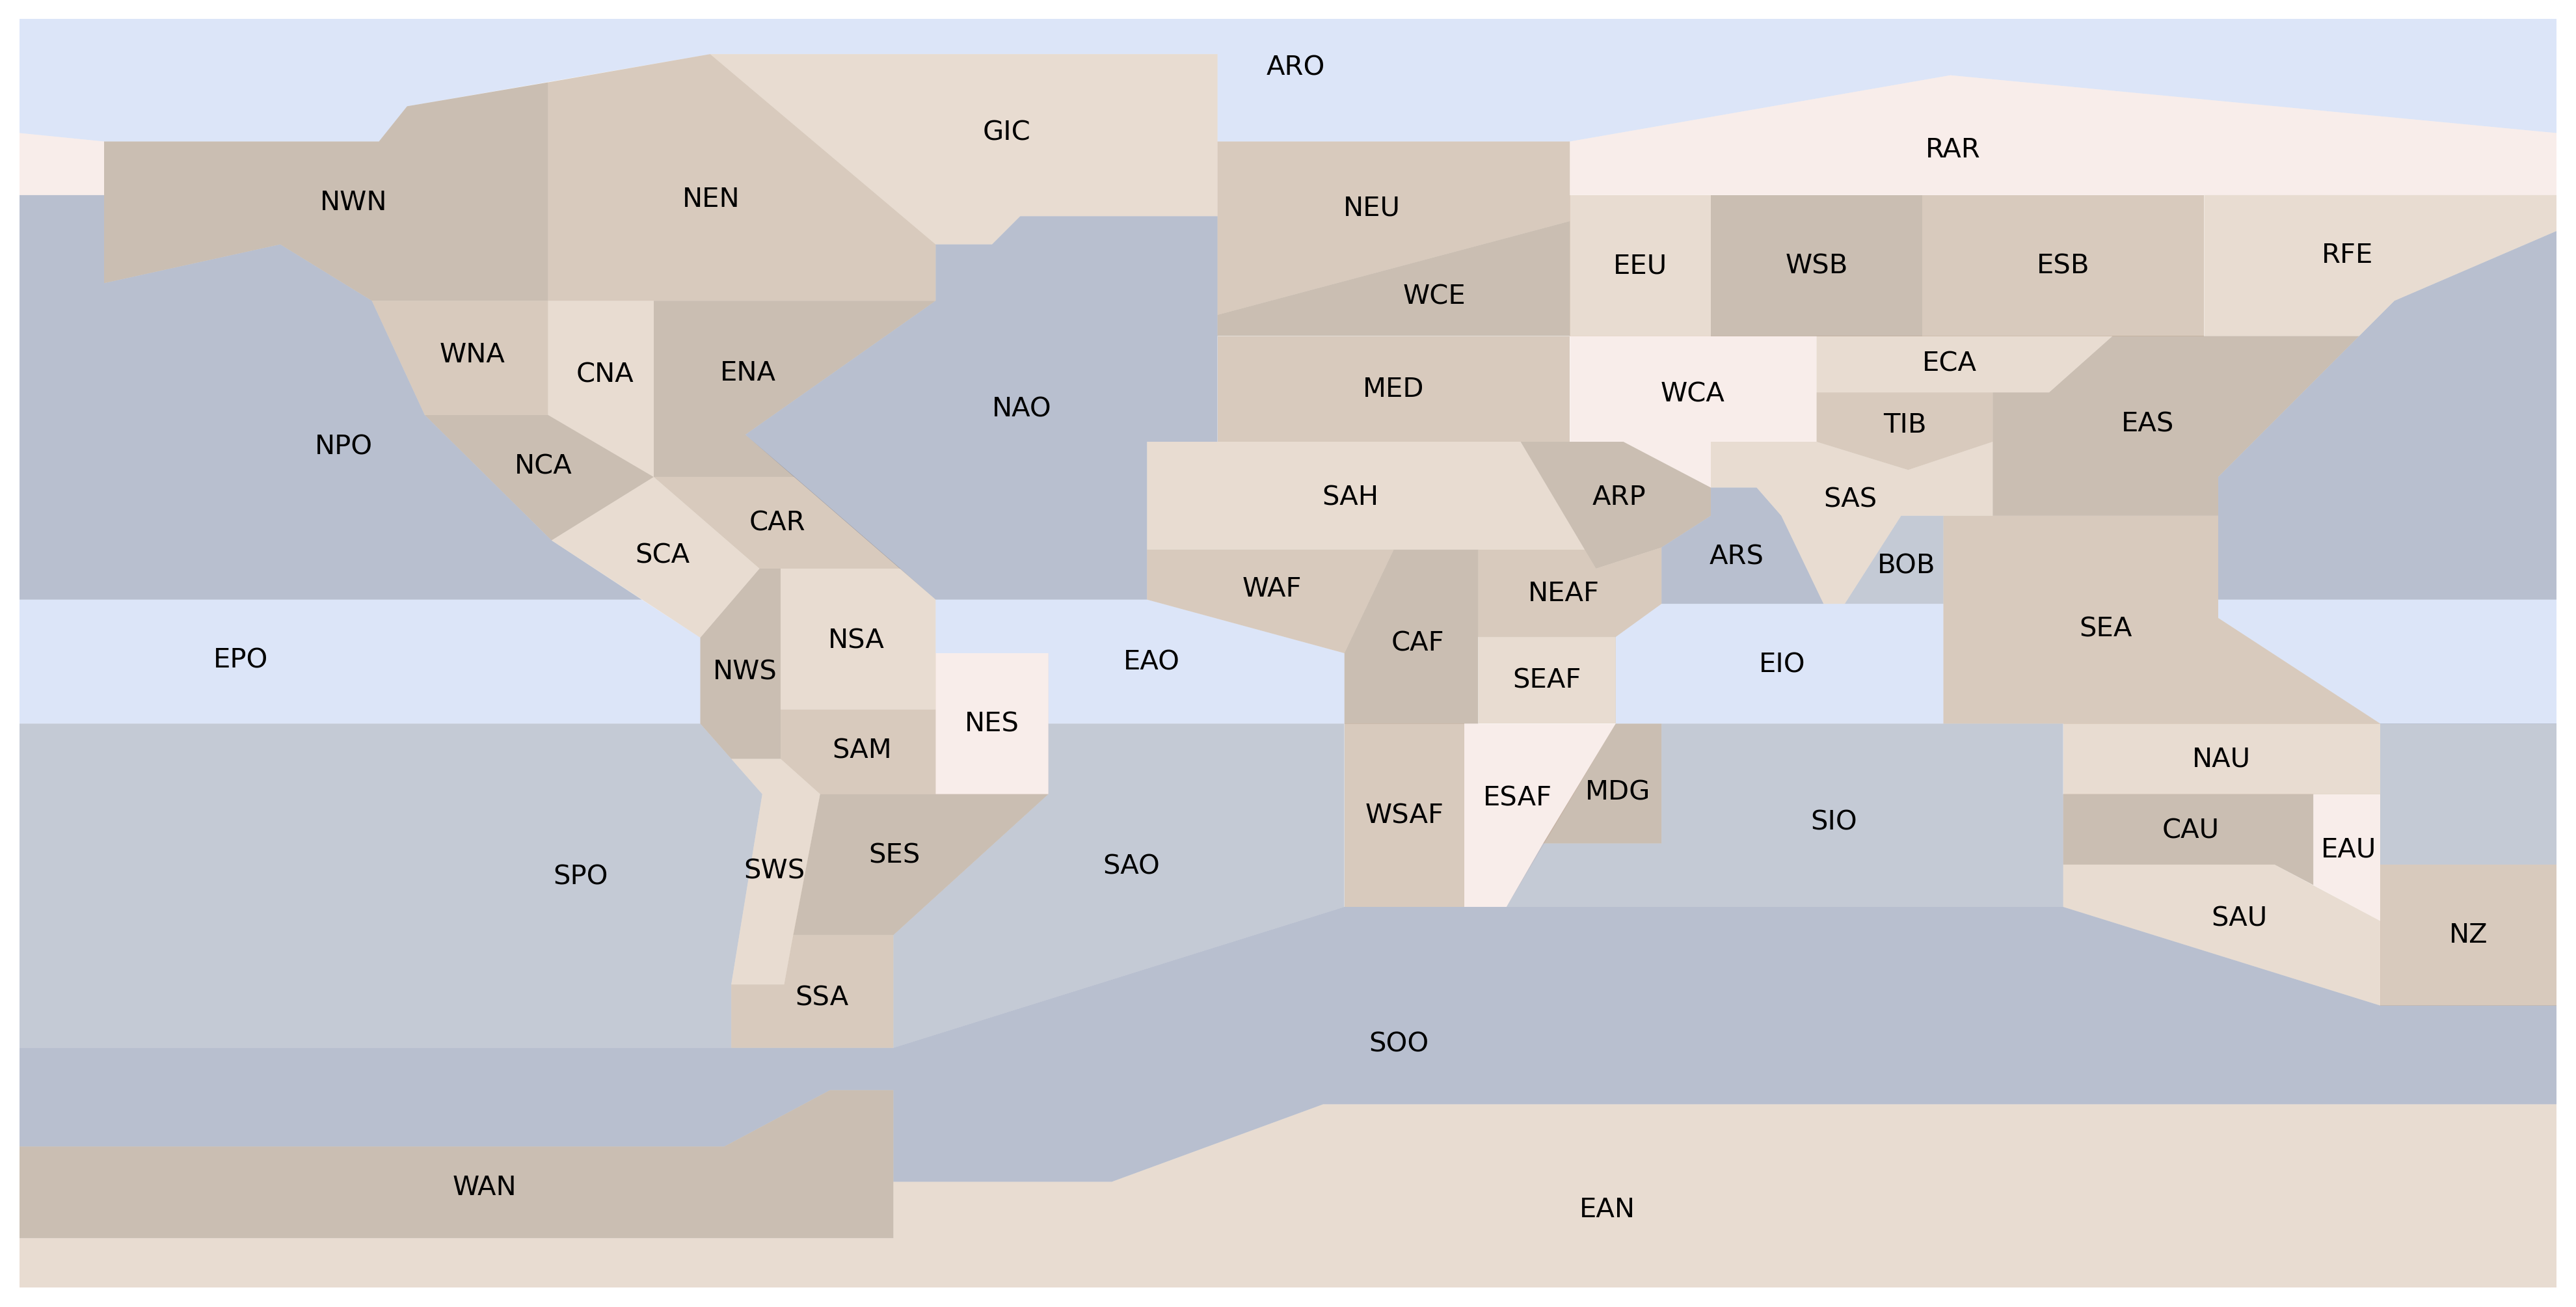

In [5]:
def small_cake(ax, region, info_dict):
    ax.axis('off')
    #ax.annotate(region, xy=(0.5,0.5), ha='center', va='center', fontsize=15)

fig,ax_map=regional_panels_on_map.regional_panels_on_map(small_cake,
                    polygons=_regions_ar6wg1.polygons, reg_info=_regions_ar6wg1.ar6wg1_reg_info, 
                    x_ext=[-180,180], y_ext=[-90,90], subax_projection='polar', projection=cartopy.crs.PlateCarree(),
                    small_plot_size=0.06, info_dict=dict(), title=None, show_region_names=True)

fig.set_facecolor(color='w')
plt.savefig('/work/uc1275/u290372/overshoot/plots/overview_maps/region_names.pdf', dpi=600)

In [5]:
oo = _regTS_ensemble.regTS_ensemble(region_name='MED-land', realm='Amon', indicator='pr', scenario='*' , esm='*', run='*')
oo.load_existing_object()
oo.check_data_usability()
oo.SMR_table()
print(oo._SMR_table[
                ['scenario', 'ESM', 'run', 'peak year', 'period before', 'period after', 'period length']
                    ].to_latex(
                        index=False, formatters={"name": str.upper}, float_format="{:.1f}".format)
     )

\begin{tabular}{lllrllr}
\toprule
   scenario &              ESM &        run &  peak year & period before & period after &  period length \\
\midrule
     ssp119 &          CanESM5 &  r10i1p1f1 &       2053 &     2006-2053 &    2053-2100 &             47 \\
     ssp119 &          CanESM5 &  r10i1p2f1 &       2058 &     2016-2058 &    2058-2100 &             42 \\
     ssp119 &          CanESM5 &  r11i1p1f1 &       2056 &     2012-2056 &    2056-2100 &             44 \\
     ssp119 &          CanESM5 &  r11i1p2f1 &       2052 &     2004-2052 &    2052-2100 &             48 \\
     ssp119 &          CanESM5 &  r12i1p1f1 &       2050 &     2000-2050 &    2050-2100 &             50 \\
     ssp119 &          CanESM5 &  r12i1p2f1 &       2054 &     2008-2054 &    2054-2100 &             46 \\
     ssp119 &          CanESM5 &  r13i1p1f1 &       2044 &     1988-2044 &    2044-2100 &             56 \\
     ssp119 &          CanESM5 &  r13i1p2f1 &       2053 &     2006-2053 &    2053-2100 &    

In [6]:
cmap = matplotlib.colormaps['BrBG'].resampled(101)
for i in [10,30,70,90]:
    print('#%02x%02x%02x' %(tuple(int(c*255) for c in cmap(i)[:-1])))

#8c510a
#dfc17c
#80cdc1
#01665e


In [7]:
cmap = matplotlib.colormaps['RdBu_r'].resampled(101)
for i in [10,30,70,90]:
    print('#%02x%02x%02x' %(tuple(int(c*255) for c in cmap(i)[:-1])))

#2166ac
#92c5de
#f4a582
#b2182b


#ed83f9
#bafdac
#9681f7
#f8c4d3


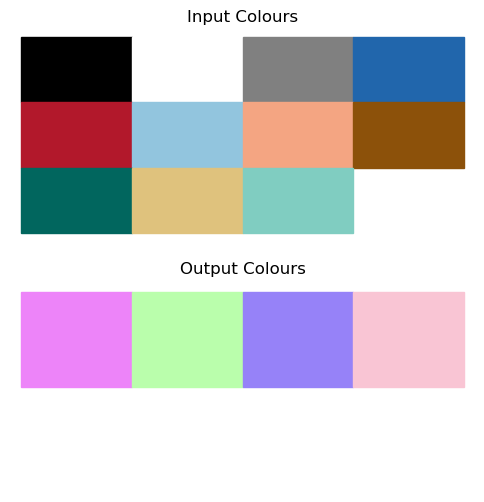

In [8]:
input_colors = [(0,0,0), (1,1,1), (0.5,0.5,0.5), 
                           matplotlib.colormaps['RdBu_r'].resampled(101)(10)[:3], 
                           matplotlib.colormaps['RdBu_r'].resampled(101)(90)[:3], 
                           matplotlib.colormaps['RdBu_r'].resampled(101)(30)[:3], 
                           matplotlib.colormaps['RdBu_r'].resampled(101)(70)[:3],
                           matplotlib.colormaps['BrBG'].resampled(101)(10)[:3],
                           matplotlib.colormaps['BrBG'].resampled(101)(90)[:3],
                           matplotlib.colormaps['BrBG'].resampled(101)(30)[:3],
                           matplotlib.colormaps['BrBG'].resampled(101)(70)[:3],
                          ]
output_colors = distinctipy.get_colors(4, input_colors, pastel_factor=1)

# display the colours
fig, axes = plt.subplots(2, 1, figsize=(6, 6))
distinctipy.color_swatch(input_colors, ax=axes[0], title="Input Colours")
distinctipy.color_swatch(output_colors, ax=axes[1], title="Output Colours")

for rgb in output_colors:
    print('#%02x%02x%02x' %(tuple(int(c*255) for c in rgb)))

In [9]:
' '.join(_regions_ar6wg1.ar6wg1_reg_info.keys())

'GIC NWN NEN WNA CNA ENA NCA SCA CAR NWS NSA NES SAM SWS SES SSA NEU WCE EEU RAR WSB ESB RFE WCA ECA TIB EAS SAS SEA MED SAH WAF CAF NEAF SEAF WSAF ESAF MDG ARP NAU CAU EAU SAU NZ EAN WAN ARO NPO EPO SPO NAO EAO SAO ARS BOB EIO SIO SOO'

In [10]:
', '.join([_regions_ar6wg1.add_land_ocean_flag(region) for region in _regions_ar6wg1.ar6wg1_reg_info.keys()])

'GIC-land, NWN-land, NEN-land, WNA-land, CNA-land, ENA-land, NCA-land, SCA-land, CAR-land, NWS-land, NSA-land, NES-land, SAM-land, SWS-land, SES-land, SSA-land, NEU-land, WCE-land, EEU-land, RAR-land, WSB-land, ESB-land, RFE-land, WCA-land, ECA-land, TIB-land, EAS-land, SAS-land, SEA-land, MED-land, SAH-land, WAF-land, CAF-land, NEAF-land, SEAF-land, WSAF-land, ESAF-land, MDG-land, ARP-land, NAU-land, CAU-land, EAU-land, SAU-land, NZ-land, EAN-land, WAN-land, ARO-ocean, NPO-ocean, EPO-ocean, SPO-ocean, NAO-ocean, EAO-ocean, SAO-ocean, ARS-ocean, BOB-ocean, EIO-ocean, SIO-ocean, SOO-ocean'

In [11]:
oo = _regTS_ensemble.regTS_ensemble(region_name='MED-land', realm='Amon', indicator='pr', scenario='*' , esm='*', run='*')
oo.load_existing_object()
', '.join(oo._models)

'ACCESS-ESM1-5, CESM2-WACCM, CanESM5, EC-Earth3, EC-Earth3-Veg-LR, FGOALS-g3, GFDL-ESM4, GISS-E2-1-G, IPSL-CM6A-LR, MIROC-ES2L, MIROC6, MPI-ESM1-2-LR, MRI-ESM2-0, UKESM1-0-LL'

In [23]:
oo = _regTS_ensemble.regTS_ensemble(region_name='MED-land', realm='Amon', indicator='pr', scenario='*' , esm='*', run='*')
oo.load_existing_object()

t = pd.DataFrame(index=[''] + list(oo._models), columns=[i+' '+s \
                                            for i in ['tas','pr','txxETCCDI','tnnETCCDI','rx1dayETCCDI','tos','od550aer','siconc','snc']\
                                            for s in ['ssp119','ssp534-over']])

t.iloc[0,:] = [i+' '+s \
                                            for i in ['','','','','','','','','']\
                                            for s in ['SSP1-19','SSP5-34-OS']]

for i in ['pr','tas','txxETCCDI','tnnETCCDI','rx1dayETCCDI']:
    for s in ['ssp119','ssp534-over']:
        if 'ETCCDI' in i:
            realm = 'ETCCDI'
        else:
            realm = 'Amon'
        oo = _regTS_ensemble.regTS_ensemble(region_name='ENA-land', realm=realm, indicator=i, scenario=s , esm='*', run='*')
        if oo.load_existing_object():
            for esm in oo._models:
                t.loc[esm, i+' '+s] = len(oo.get_smrs_for_model(esm))

                
regio = _regTS_ensemble.regTS_ensemble(region_name='MED-land', realm='Amon', indicator='pr', scenario='*' , esm='*', run='*')
regio.load_existing_object()                
for indicator in ['tos','od550aer','siconc','sic']:
    for scenario in ['ssp119','ssp534-over']:
        for esm in t.index:            
            files = glob.glob('/work/uc1275/u290372/overshoot/gridded_period_averages/%s/%s_%s*periods.nc' %(indicator,esm, scenario))
            if len(files) > 0:
                data = xr.open_mfdataset('/work/uc1275/u290372/overshoot/gridded_period_averages/%s/%s_%s*periods.nc' %(indicator,esm,scenario),
                                     combine='nested', concat_dim='SMR')                
                avail_smrs = data.SMR.values
                SMRs = regio.get_smrs_for_model(esm)            
                t.loc[esm, indicator+' '+scenario] = np.sum(np.isin(avail_smrs, SMRs))
                
t.columns = [i \
                                            for i in ['tas','pr','txxETCCDI','tnnETCCDI','rx1dayETCCDI','tos','od550aer','siconc','snc']\
                                            for s in ['SSP1-19','SSP5-34-OS']]

In [24]:
t = t.fillna('')

In [25]:
t

,tas,tas,pr,pr,txxETCCDI,txxETCCDI,tnnETCCDI,tnnETCCDI,rx1dayETCCDI,rx1dayETCCDI,tos,tos,od550aer,od550aer,siconc,siconc,snc,snc
,SSP1-19,SSP5-34-OS,SSP1-19,SSP5-34-OS,SSP1-19,SSP5-34-OS,SSP1-19,SSP5-34-OS,SSP1-19,SSP5-34-OS,SSP1-19,SSP5-34-OS,SSP1-19,SSP5-34-OS,SSP1-19,SSP5-34-OS,SSP1-19,SSP5-34-OS
ACCESS-ESM1-5,,1,,1,,,,,,,,1,,,,1,,
CESM2-WACCM,,2,,2,,,,,,,,2,,2,,2,,
CanESM5,48,5,48,5,48,,48,,48,5,5,5,48,5,7,5,,
EC-Earth3,22,,22,,22,,22,,22,,22,0,,,0,0,,
EC-Earth3-Veg-LR,3,,3,,3,,3,,3,,3,,,,1,,,
FGOALS-g3,1,1,1,1,,,,,,,1,1,,,1,1,,
GFDL-ESM4,1,,1,,1,,1,,1,,1,,1,,1,,,
GISS-E2-1-G,,6,,6,,,,,,,0,1,,5,,,,
IPSL-CM6A-LR,6,1,6,1,6,,6,,6,,6,1,6,1,6,1,,


In [26]:
replace_dict = {
    'pr' : 'precipitation (monthly)',
    'tas' : 'surface air temperature (monthly)',
    'tos' : 'sea surface temperature (monthly)',
    'txxETCCDI' : 'yearly maximum of daily maximum temperatures (TXx)',
    'tnnETCCDI' : 'yearly minimum of daily minimum temperatures (TNn)',
    'rx1dayETCCDI' : 'yearly maximum daily precipitation (RX1day)',
    'od550aer' : 'ambient aerosol optical thickness at 550nm',
    'siconc' : 'sea-ice area percentage',
    'snc' : 'snow area percentage',
}    

In [27]:
latex = t.iloc[:,:2].to_latex()
latex = latex.replace(' ','')

for i in np.unique(t.columns):
    latex = latex.replace(i+'&'+i, '\multicolumn{2}{l}{\parbox{5cm}{%s}}' %(replace_dict[i]))

latex = latex.replace('\\\\','\\\\ \hline').replace('ll','l|l')

In [28]:
print(latex)

\begin{tabular}{l|ll}
\toprule
{}&\multicolumn{2}{l}{\parbox{5cm}{surface air temperature (monthly)}}\\ \hline
\midrule
&SSP1-19&SSP5-34-OS\\ \hline
ACCESS-ESM1-5&&1\\ \hline
CESM2-WACCM&&2\\ \hline
CanESM5&48&5\\ \hline
EC-Earth3&22&\\ \hline
EC-Earth3-Veg-LR&3&\\ \hline
FGOALS-g3&1&1\\ \hline
GFDL-ESM4&1&\\ \hline
GISS-E2-1-G&&6\\ \hline
IPSL-CM6A-LR&6&1\\ \hline
MIROC-ES2L&3&1\\ \hline
MIROC6&1&1\\ \hline
MPI-ESM1-2-LR&30&\\ \hline
MRI-ESM2-0&1&1\\ \hline
UKESM1-0-LL&&1\\ \hline
\bottomrule
\end{tabular}



In [29]:
latex = t.iloc[:,:].to_latex()
latex = latex.replace(' ','')

for i in np.unique(t.columns):
    latex = latex.replace(i+'&'+i, '\\multicolumn{2}{|l}{\\rotatebox{90}{%s}}' %(replace_dict[i]))

latex = latex.replace('\\\\','\\\\ \hline').replace('ll','l|l').replace('ll','l|l')
latex = latex.replace('SSP1-19', '\\rotatebox{90}{SSP1-19}')
latex = latex.replace('SSP5-34-OS', '\\rotatebox{90}{SSP5-34-OS}')
print(latex)

\begin{tabular}{l|l|l|l|l|l|l|l|l|l|l|l|l|l|l|l|l|l|l}
\toprule
{}&\multicolumn{2}{|l}{\rotatebox{90}{surface air temperature (monthly)}}&\multicolumn{2}{|l}{\rotatebox{90}{precipitation (monthly)}}&\multicolumn{2}{|l}{\rotatebox{90}{yearly maximum of daily maximum temperatures (TXx)}}&\multicolumn{2}{|l}{\rotatebox{90}{yearly minimum of daily minimum temperatures (TNn)}}&\multicolumn{2}{|l}{\rotatebox{90}{yearly maximum daily precipitation (RX1day)}}&\multicolumn{2}{|l}{\rotatebox{90}{sea surface temperature (monthly)}}&\multicolumn{2}{|l}{\rotatebox{90}{ambient aerosol optical thickness at 550nm}}&\multicolumn{2}{|l}{\rotatebox{90}{sea-ice area percentage}}&\multicolumn{2}{|l}{\rotatebox{90}{snow area percentage}}\\ \hline
\midrule
&\rotatebox{90}{SSP1-19}&\rotatebox{90}{SSP5-34-OS}&\rotatebox{90}{SSP1-19}&\rotatebox{90}{SSP5-34-OS}&\rotatebox{90}{SSP1-19}&\rotatebox{90}{SSP5-34-OS}&\rotatebox{90}{SSP1-19}&\rotatebox{90}{SSP5-34-OS}&\rotatebox{90}{SSP1-19}&\rotatebox{90}{SSP5-34-OS}&